,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:36:38
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5704,0.6027,0.5129,0.5538,0.5326,0.1363,0.1366
1,0.5669,0.5767,0.4760,0.5536,0.5119,0.1266,0.1278
2,0.5713,0.5923,0.5000,0.5565,0.5267,0.1370,0.1376
3,0.5845,0.6057,0.5055,0.5732,0.5373,0.1629,0.1640
4,0.5748,0.6086,0.4502,0.5688,0.5026,0.1400,0.1429
5,0.5968,0.6067,0.5074,0.5901,0.5456,0.1870,0.1887
6,0.5713,0.6002,0.4686,0.5607,0.5106,0.1346,0.1363
7,0.5880,0.6205,0.4825,0.5835,0.5282,0.1684,0.1708
8,0.6065,0.6122,0.5138,0.6039,0.5552,0.2065,0.2087


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:36:41
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5704,0.6028,0.5148,0.5536,0.5335,0.1364,0.1367
1,0.5660,0.5773,0.4779,0.5522,0.5124,0.1251,0.1261
2,0.5731,0.5921,0.5000,0.5588,0.5278,0.1404,0.1411
3,0.5836,0.6059,0.5055,0.5720,0.5367,0.1612,0.1623
4,0.5748,0.6085,0.4502,0.5688,0.5026,0.1400,0.1429
5,0.5968,0.6067,0.5055,0.5905,0.5447,0.1868,0.1887
6,0.5722,0.6002,0.4705,0.5617,0.5120,0.1364,0.1381
7,0.5871,0.6214,0.4807,0.5826,0.5267,0.1665,0.1690
8,0.6048,0.6127,0.5101,0.6022,0.5523,0.2028,0.2051


Fitting 10 folds for each of 10 candidates, totalling 100 fits


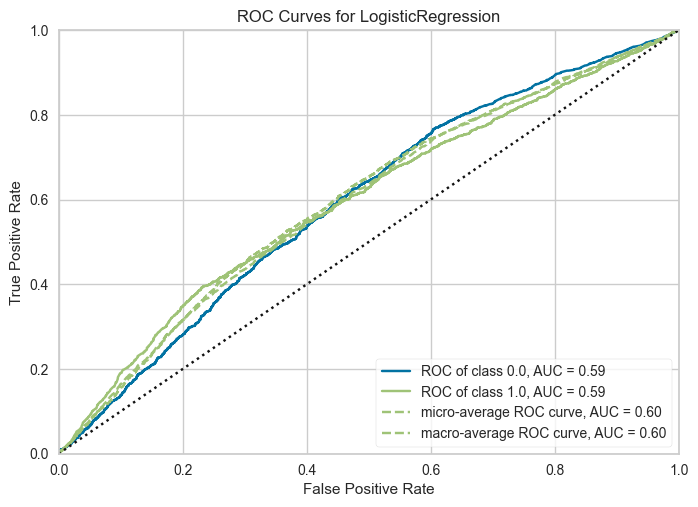

In [25]:
import pycaret.classification as pc
import pandas as pd
from sklearn.metrics import log_loss



X_test = pd.read_parquet("C:/Users/shtsu/Codigos/23E1_3/projeto/data/03_primary/X_test.parquet")
y_test = pd.read_parquet("C:/Users/shtsu/Codigos/23E1_3/projeto/data/03_primary/y_test.parquet")

X_train = pd.read_parquet("C:/Users/shtsu/Codigos/23E1_3/projeto/data/03_primary/X_train.parquet")
y_train = pd.read_parquet("C:/Users/shtsu/Codigos/23E1_3/projeto/data/03_primary/y_train.parquet")
data_train = pd.concat([X_train, y_train], axis=1)

clf = pc.setup(data = data_train, target = "shot_made_flag")

lr = pc.create_model('lr')
tuned_lr = pc.tune_model(lr)
plot_model(tuned_lr, plot='auc')

y_pred = lr.predict_proba(X_test)
log_loss_score = log_loss(y_test, y_pred)
print('Log loss score: {:.4f}'.format(log_loss_score))


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:35:31
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5907,0.6116,0.4982,0.5832,0.5373,0.1744,0.1761
1,0.5775,0.5881,0.4686,0.5695,0.5142,0.1465,0.1487
2,0.5775,0.5923,0.4834,0.5671,0.5219,0.1476,0.1492
3,0.5722,0.5701,0.4945,0.5583,0.5245,0.1383,0.1391
4,0.5827,0.6061,0.4982,0.5720,0.5325,0.1590,0.1602
5,0.5739,0.5869,0.4852,0.5620,0.5208,0.1410,0.1422
6,0.5528,0.5667,0.4594,0.5366,0.4950,0.0981,0.0990
7,0.5924,0.6170,0.4862,0.5893,0.5328,0.1772,0.1798
8,0.5880,0.6107,0.4917,0.5817,0.5329,0.1690,0.1709


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:35:33
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


Fitting 10 folds for each of 10 candidates, totalling 100 fits


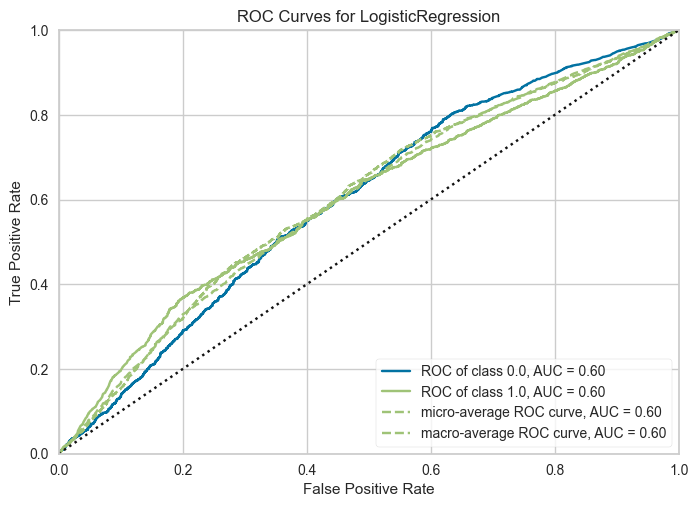

In [12]:
import pycaret.classification as pc
import pandas as pd
from sklearn.metrics import log_loss
import mlflow

# get env name
import os
import sys
env_name = os.path.basename(os.path.dirname(sys.executable))
#print(env_name)

X_test = pd.read_parquet("C:/Users/shtsu/Codigos/23E1_3/projeto/data/03_primary/X_test.parquet")
y_test = pd.read_parquet("C:/Users/shtsu/Codigos/23E1_3/projeto/data/03_primary/y_test.parquet")

X_train = pd.read_parquet("C:/Users/shtsu/Codigos/23E1_3/projeto/data/03_primary/X_train.parquet")
y_train = pd.read_parquet("C:/Users/shtsu/Codigos/23E1_3/projeto/data/03_primary/y_train.parquet")
data_train = pd.concat([X_train, y_train], axis=1)

mlflow.set_tracking_uri('http://localhost:5000/')

EXPERIMENT_NAME = "kobe"
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

tags = {
        "Projeto": "22E1_3_Kobe",
        "team": "Daniel S. U. Tamashiro",
        "dataset": "Kobe Bryant Shot Selection"
       }


RUN_NAME= env_name
with mlflow.start_run(experiment_id=experiment, run_name=RUN_NAME) as run:
#with mlflow.start_run():


    clf = pc.setup(data = data_train, target = "shot_made_flag")
    lr = pc.create_model('lr')
    tuned_lr = pc.tune_model(lr)
    pc.plot_model(tuned_lr, plot='auc')

    y_pred = lr.predict_proba(X_test)
    log_loss_score = log_loss(y_test, y_pred)
    print('Log loss score: {:.4f}'.format(log_loss_score))

    #Track tags
    mlflow.set_tags(tags)

    # Track parameters
    mlflow.log_param("target", "shot_made_flag")
    mlflow.log_param("model", "lr")

    # Track metrics
    mlflow.log_metric("log_loss", log_loss_score)

    # Track model
    #mlflow.sklearn.log_model(pipe, "model")
    
    #Registro do modelo
    mlflow.log_artifact(local_path='./model.ipynb',artifact_path='code')
    


mlflow.end_run()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:40:02
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5801,0.6054,0.4852,0.5705,0.5244,0.1529,0.1545
1,0.5775,0.5989,0.4945,0.5654,0.5276,0.1485,0.1496
2,0.5871,0.6092,0.4982,0.5782,0.5352,0.1675,0.1690
3,0.5616,0.6022,0.4520,0.5493,0.4960,0.1145,0.1162
4,0.6048,0.6226,0.5314,0.5963,0.5620,0.2041,0.2052
5,0.5836,0.5921,0.5129,0.5708,0.5403,0.1618,0.1626
6,0.5968,0.6123,0.4871,0.5946,0.5355,0.1855,0.1884
7,0.5581,0.5687,0.4346,0.5476,0.4846,0.1067,0.1089
8,0.5405,0.5535,0.4604,0.5219,0.4892,0.0746,0.0751


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:40:25
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5801,0.6054,0.4852,0.5705,0.5244,0.1529,0.1545
1,0.5775,0.5990,0.4945,0.5654,0.5276,0.1485,0.1496
2,0.5871,0.6091,0.4982,0.5782,0.5352,0.1675,0.1690
3,0.5616,0.6022,0.4520,0.5493,0.4960,0.1145,0.1162
4,0.6048,0.6226,0.5314,0.5963,0.5620,0.2041,0.2052
5,0.5836,0.5921,0.5129,0.5708,0.5403,0.1618,0.1626
6,0.5968,0.6123,0.4871,0.5946,0.5355,0.1855,0.1884
7,0.5581,0.5688,0.4346,0.5476,0.4846,0.1067,0.1089
8,0.5405,0.5534,0.4604,0.5219,0.4892,0.0746,0.0751


Fitting 10 folds for each of 10 candidates, totalling 100 fits


NameError: name 'plot_model' is not defined

In [9]:
import os
import sys
print('Currently in virtual environment:', os.path.basename(sys.executable))

Currently in virtual environment: python.exe


In [8]:
sys.executable


'c:\\Users\\shtsu\\anaconda3\\envs\\22E1_Kobe\\python.exe'

22E1_Kobe


In [5]:
!conda activate 22E1_Kobe
